In [1]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [2]:
sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

Text(0.5, 1.0, 'Scatter Plot of Data')

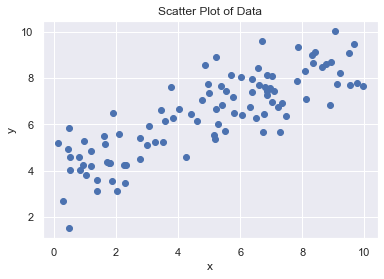

In [3]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')

In [5]:
!export CC=gcc

In [6]:
!export CXX=g++

In [7]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}

# Compile the model
sm = pystan.StanModel(model_code=model)

# Train the model and generate samples
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cb4cc9c2a04d0e34d711077557307fb7 NOW.
clang-10: warning: -Wl,-export_dynamic: 'linker' input unused [-Wunused-command-line-argument]
In file included from /var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/pystan_y2jj3lp4/stanfit4anon_model_cb4cc9c2a04d0e34d711077557307fb7_1819686728710042177.cpp:62:
/Users/philip/miniconda3/envs/bpenv/include/python3.8/Python.h:14:2: error: "Something's broken.  UCHAR_MAX should be defined in limits.h."
#error "Something's broken.  UCHAR_MAX should be defined in limits.h."
 ^
/Users/philip/miniconda3/envs/bpenv/include/python3.8/Python.h:18:2: error: "Python's source code assumes C's unsigned char is an 8-bit type."
#error "Python's source code assumes C's unsigned char is an 8-bit type."
 ^
/Users/philip/miniconda3/envs/bpenv/include/python3.8/Python.h:27:5: error: "Python.h requires that stdio.h define NULL."
#   error "Python.h requires that stdio.h define NULL."
    ^
In file included from /var

clang-10: note: diagnostic msg: Error generating preprocessed source(s).


CompileError: command 'x86_64-apple-darwin13.4.0-clang' failed with exit status 254

In [6]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

NameError: name 'fit' is not defined

In [ ]:
x_min, x_max = -0.5, 10.5
x_plot = np.linspace(x_min, x_max, 100)

# Plot a subset of sampled regression lines
for i in np.random.randint(0, len(alpha), 1000):
    plt.plot(x_plot, alpha[i] + beta[i] * x_plot, color='lightsteelblue',
            alpha=0.005)

# Plot mean regression line  
plt.plot(x_plot, alpha_mean + beta_mean * x_plot)
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Regression Line')
plt.xlim(x_min, x_max)

In [ ]:
def plot_trace(param, param_name='parameter'):
    """Plot the trace and posterior of a parameter."""

    # Summary statistics
    mean = np.mean(param)
    median = np.median(param)
    cred_min, cred_max = np.percentile(param, 2.5), np.percentile(param, 97.5)

    # Plotting
    plt.subplot(2,1,1)
    plt.plot(param)
    plt.xlabel('samples')
    plt.ylabel(param_name)
    plt.axhline(mean, color='r', lw=2, linestyle='--')
    plt.axhline(median, color='c', lw=2, linestyle='--')
    plt.axhline(cred_min, linestyle=':', color='k', alpha=0.2)
    plt.axhline(cred_max, linestyle=':', color='k', alpha=0.2)
    plt.title('Trace and Posterior Distribution for {}'.format(param_name))

    plt.subplot(2,1,2)
    plt.hist(param, 30, density=True); sns.kdeplot(param, shade=True)
    plt.xlabel(param_name)
    plt.ylabel('density')
    plt.axvline(mean, color='r', lw=2, linestyle='--',label='mean')
    plt.axvline(median, color='c', lw=2, linestyle='--',label='median')
    plt.axvline(cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI')
    plt.axvline(cred_max, linestyle=':', color='k', alpha=0.2)

    plt.gcf().tight_layout()
    plt.legend()


In [ ]:
plot_trace(alpha, 'alpha')
plot_trace(beta, 'beta')
plot_trace(sigma, 'sigma')
plot_trace(lp, 'lp__')